<a href="https://colab.research.google.com/github/itsmitch-code/Care_hospital/blob/main/_EmotionIdentification_ResearchTeaser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/CheyneyComputerScience/CREMA-D.git

Cloning into 'CREMA-D'...
remote: Enumerating objects: 22501, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 22501 (delta 22), reused 57 (delta 13), pack-reused 22428
Receiving objects: 100% (22501/22501), 14.82 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Updating files: 100% (22342/22342), done.


In [ ]:
import librosa
import os

audio_dir = '/content/CREMA-D/AudioWAV'
audio_files = os.listdir(audio_dir)

# Load the first audio file in the directory
example_audio_path = os.path.join(audio_dir, audio_files[0])
data, sampling_rate = librosa.load(example_audio_path, sr=None)
print(f"Loaded file '{example_audio_path}' with sampling rate: {sampling_rate}")



In [ ]:
for audio_file in audio_files:
    audio_path = os.path.join(audio_dir, audio_file)
    try:
        data, sampling_rate = librosa.load(audio_path, sr=None)
        print(f"Loaded file '{audio_path}' with sampling rate: {sampling_rate}")
    except Exception as e:
        print(f"Failed to load file '{audio_path}': {e}")


Streaming output truncated to the last 5000 lines.
Loaded file '/content/CREMA-D/AudioWAV/1042_IEO_DIS_HI.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1025_IWL_NEU_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1014_ITH_ANG_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1044_TAI_HAP_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1018_ITS_SAD_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1016_IWW_SAD_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1061_IWW_DIS_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1009_WSI_NEU_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1072_TSI_DIS_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1057_DFA_FEA_XX.wav' with sampling rate: 16000
Loaded file '/content/CREMA-D/AudioWAV/1054_TAI_SAD_XX.wav' with sampling rate: 16000
Loa

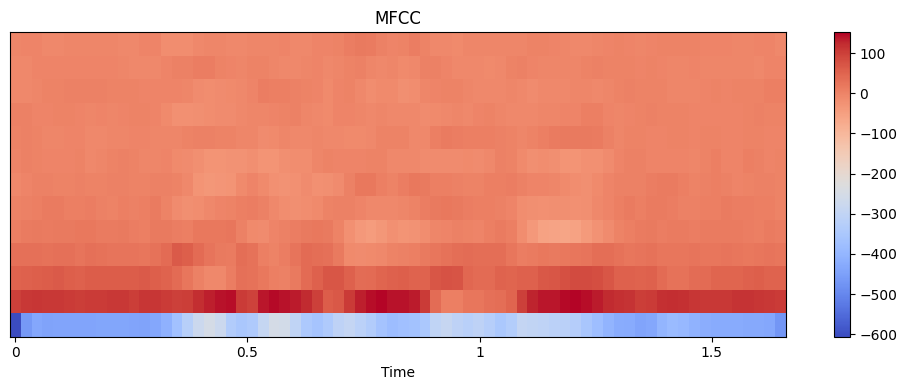

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to extract MFCCs
def extract_mfccs(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfccs, sr

# Example file path
example_audio_path = os.path.join('CREMA-D/AudioWAV', audio_files[0])

# Extract MFCCs
mfccs, sr = extract_mfccs(example_audio_path)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


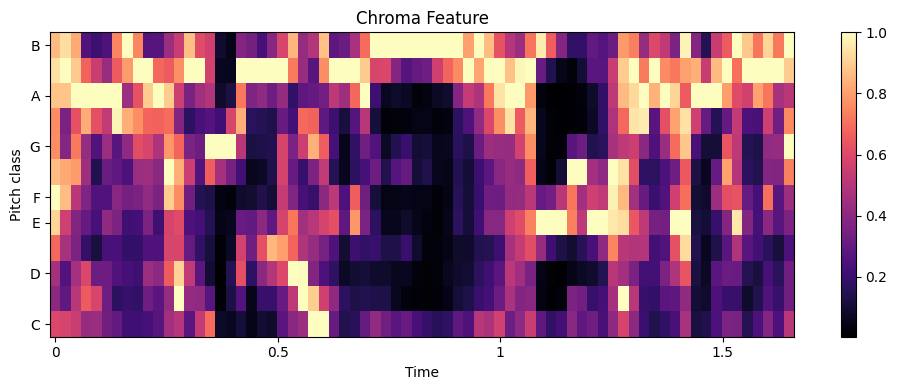

In [ ]:
# Function to extract Chroma features
def extract_chroma(file_path):
    y, sr = librosa.load(file_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return chroma, sr

# Extract Chroma features
chroma, sr = extract_chroma(example_audio_path)

# Display Chroma features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()


In [ ]:
# Function to extract all features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    return mfccs, chroma, spectral_contrast

# Extract features for all audio files
features = []
for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    mfccs, chroma, spectral_contrast = extract_features(audio_path)
    features.append((mfccs, chroma, spectral_contrast))

# Example of how to use the extracted features
# Here we simply print the shape of the extracted features for the first file
mfccs, chroma, spectral_contrast = features[0]
print("MFCCs shape:", mfccs.shape)
print("Chroma shape:", chroma.shape)
print("Spectral Contrast shape:", spectral_contrast.shape)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


MFCCs shape: (13, 72)
Chroma shape: (12, 72)
Spectral Contrast shape: (7, 72)


In [ ]:
import pandas as pd

# Function to extract labels from filename
def extract_labels(filename):
    parts = filename.split('_')
    speaker_id = parts[0]
    emotion = parts[2]
    return speaker_id, emotion

# Create a DataFrame to store features and labels
data = []

for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    mfccs, chroma, spectral_contrast = extract_features(audio_path)
    speaker_id, emotion = extract_labels(audio_file)
    data.append([mfccs, chroma, spectral_contrast, speaker_id, emotion])

df = pd.DataFrame(data, columns=['MFCCs', 'Chroma', 'Spectral_Contrast', 'Speaker_ID', 'Emotion'])

# Display the first few rows of the DataFrame
df.head()


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


,MFCCs,Chroma,Spectral_Contrast,Speaker_ID,Emotion
0,"[[-606.34924, -466.4337, -436.72424, -445.7951...","[[0.5920359, 0.57645375, 0.5463845, 0.4270369,...","[[6.21652750835371, 6.754266832551101, 12.2546...",1066,FEA
1,"[[-443.09622, -418.41968, -301.70584, -222.863...","[[0.44423014, 0.14703818, 0.46208155, 0.796028...","[[11.283853951699689, 13.220266351975049, 18.9...",1059,FEA
2,"[[-464.2016, -446.331, -446.1126, -448.2634, -...","[[0.044851147, 0.05636184, 0.16580425, 0.38117...","[[8.934008689943123, 8.78792008199156, 11.4363...",1039,DIS
3,"[[-462.2866, -447.73975, -448.70438, -444.4942...","[[0.2957975, 0.42292777, 0.35328653, 0.1331238...","[[11.086759332645496, 12.522343880907837, 10.8...",1044,FEA
4,"[[-488.4523, -494.24908, -512.21704, -512.4452...","[[0.6265163, 0.46448725, 0.10150675, 0.1084928...","[[12.24654972286359, 14.156059884011448, 14.82...",1088,HAP


In [ ]:
import numpy as np
import librosa
import os

# Function to pad features
def pad_features(features, max_length):
    padded_features = np.zeros((features.shape[0], max_length))
    for i in range(features.shape[0]):
        length = min(features.shape[1], max_length)
        padded_features[i, :length] = features[i, :length]
    return padded_features

# Function to extract and pad features
def extract_and_pad_features(file_path, max_length=100):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    mfccs_padded = pad_features(mfccs, max_length)
    chroma_padded = pad_features(chroma, max_length)
    spectral_contrast_padded = pad_features(spectral_contrast, max_length)
    return np.concatenate((mfccs_padded, chroma_padded, spectral_contrast_padded), axis=0)

# Example file path
example_audio_path = os.path.join('CREMA-D/AudioWAV', audio_files[0])
features_padded = extract_and_pad_features(example_audio_path)
print("Padded features shape:", features_padded.shape)


Padded features shape: (32, 100)


In [ ]:
# Set a maximum length for padding
MAX_LENGTH = 100

# Extract and pad features for all audio files
data = []
labels = []

for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    features_padded = extract_and_pad_features(audio_path, max_length=MAX_LENGTH)
    speaker_id, emotion = extract_labels(audio_file)
    data.append(features_padded)
    labels.append(emotion)





/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import librosa
import os

# Function to extract labels from filename
def extract_labels(filename):
    parts = filename.split('_')
    speaker_id = parts[0]
    emotion = parts[2]
    return speaker_id, emotion

# Function to extract all features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    return mfccs, chroma, spectral_contrast

# Create a DataFrame to store features and labels
data = []

for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    mfccs, chroma, spectral_contrast = extract_features(audio_path)
    speaker_id, emotion = extract_labels(audio_file)
    data.append([mfccs, chroma, spectral_contrast, speaker_id, emotion])

df = pd.DataFrame(data, columns=['MFCCs', 'Chroma', 'Spectral_Contrast', 'Speaker_ID', 'Emotion'])

# Determine the fixed length for padding/truncating
fixed_length = 100  # or choose an appropriate length based on your data

# Function to pad/truncate features
def pad_features(features, length):
    if features.shape[1] > length:
        return features[:, :length]
    elif features.shape[1] < length:
        return np.pad(features, ((0, 0), (0, length - features.shape[1])), mode='constant')
    else:
        return features

# Apply padding/truncating to features
df['MFCCs'] = df['MFCCs'].apply(lambda x: pad_features(x, fixed_length))
df['Chroma'] = df['Chroma'].apply(lambda x: pad_features(x, fixed_length))
df['Spectral_Contrast'] = df['Spectral_Contrast'].apply(lambda x: pad_features(x, fixed_length))

# Flatten features
def flatten_features(mfccs, chroma, spectral_contrast):
    return np.concatenate([mfccs.flatten(), chroma.flatten(), spectral_contrast.flatten()])

df['Flattened_Features'] = df.apply(lambda row: flatten_features(row['MFCCs'], row['Chroma'], row['Spectral_Contrast']), axis=1)

# Encode labels
label_encoder = LabelEncoder()
df['Emotion_Label'] = label_encoder.fit_transform(df['Emotion'])

# Split data into features (X) and labels (y)
X = np.array(df['Flattened_Features'].tolist())
y = np.array(df['Emotion_Label'].tolist())

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for deep learning model (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], fixed_length, -1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


X_train shape: (5953, 100, 32)
X_test shape: (1489, 100, 32)
y_train shape: (5953,)
y_test shape: (1489,)


In [ ]:
!pip install tensorflow keras-tcn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tcn import TCN

# Define the TCN model
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(TCN(input_shape=input_shape, nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8], nb_stacks=1))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two classes

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for multiclass
    return model

# Define the input shape based on your data
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the model
model = build_tcn_model(input_shape)

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                94784     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
187/187 [==============================] - 39s 163ms/step - loss: -3469699530620928.0000 - accuracy: 0.1693 - val_loss: -66892633871482880.0000 - val_accuracy: 0.1780
Epoch 2/30
187/187 [==============================] - 18s 98ms/step - loss: nan - accuracy: 0.1791 - val_loss: nan - val_accuracy: 0.1625
Epoch 3/30
187/187 [==============================] - 16s 88ms/step - loss: nan - accuracy: 0.1729 - val_loss: nan - val_accuracy: 0.1625
Epoch 4/30
187/187 [==============================] - 16s 83ms/step - loss: nan - accuracy: 0.1729 - val_loss: nan - val_accuracy: 0.1625
Epoch 5/30
187/187 [==============================] - 15s 83ms/step - loss: nan - accuracy: 0.1729 - val_loss: nan - val_accuracy: 0.1625
Epoch 6/30
187/187 [==============================] - 17s 90ms/step - loss: nan - accuracy: 0.1729 - val_loss: nan - val_accuracy: 0.1625
Epoch 7/30
187/187 [==============================] - 15s 82ms/step - loss: nan - accuracy: 0.1729 - val_loss: nan - val_accuracy: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


47/47 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.1625
Test Loss: nan
Test Accuracy: 0.16252519190311432


In [ ]:
model.save('tcn_emotion_classification_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


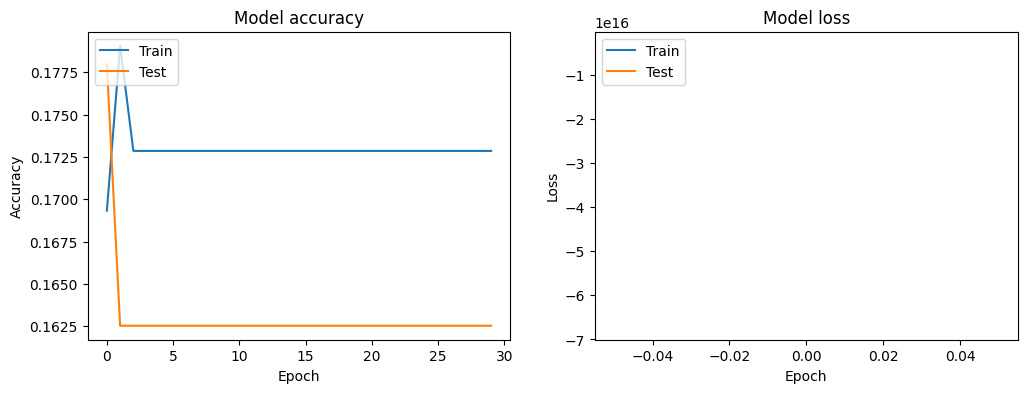

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [ ]:
# Check for NaN values in the training and test data
print(f"NaN values in X_train: {np.isnan(X_train).sum()}")
print(f"NaN values in y_train: {np.isnan(y_train).sum()}")
print(f"NaN values in X_test: {np.isnan(X_test).sum()}")
print(f"NaN values in y_test: {np.isnan(y_test).sum()}")


NaN values in X_train: 0
NaN values in y_train: 0
NaN values in X_test: 0
NaN values in y_test: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tcn import TCN

# Define the TCN model with a lower learning rate
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(TCN(input_shape=input_shape, nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8], nb_stacks=1))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two classes

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for multiclass
    return model

# Define the input shape based on your data
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the model
model = build_tcn_model(input_shape)

# Display the model summary
model.summary()

# Train the model with NaN callback
class NaNCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            for key, value in logs.items():
                if np.isnan(value):
                    print(f"NaN value found in {key} at epoch {epoch}")

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[NaNCallback()])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_1 (TCN)                 (None, 64)                94784     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Function to extract labels from filename
def extract_labels(filename):
    parts = filename.split('_')
    speaker_id = parts[0]
    emotion = parts[2]
    return speaker_id, emotion

# Function to extract all features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    return mfccs, chroma, spectral_contrast

# Create a DataFrame to store features and labels
data = []

audio_files = os.listdir('CREMA-D/AudioWAV')

for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    mfccs, chroma, spectral_contrast = extract_features(audio_path)
    speaker_id, emotion = extract_labels(audio_file)
    data.append([mfccs, chroma, spectral_contrast, speaker_id, emotion])

df = pd.DataFrame(data, columns=['MFCCs', 'Chroma', 'Spectral_Contrast', 'Speaker_ID', 'Emotion'])

# Determine the fixed length for padding/truncating
fixed_length = 100  # or choose an appropriate length based on your data

# Function to pad/truncate features
def pad_features(features, length):
    if features.shape[1] > length:
        return features[:, :length]
    elif features.shape[1] < length:
        return np.pad(features, ((0, 0), (0, length - features.shape[1])), mode='constant')
    else:
        return features

# Apply padding/truncating to features
df['MFCCs'] = df['MFCCs'].apply(lambda x: pad_features(x, fixed_length))
df['Chroma'] = df['Chroma'].apply(lambda x: pad_features(x, fixed_length))
df['Spectral_Contrast'] = df['Spectral_Contrast'].apply(lambda x: pad_features(x, fixed_length))

# Flatten features
def flatten_features(mfccs, chroma, spectral_contrast):
    return np.concatenate([mfccs.flatten(), chroma.flatten(), spectral_contrast.flatten()])

df['Flattened_Features'] = df.apply(lambda row: flatten_features(row['MFCCs'], row['Chroma'], row['Spectral_Contrast']), axis=1)

# Encode labels
label_encoder = LabelEncoder()
df['Emotion_Label'] = label_encoder.fit_transform(df['Emotion'])

# Split data into features (X) and labels (y)
X = np.array(df['Flattened_Features'].tolist())
y = np.array(df['Emotion_Label'].tolist())

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for deep learning model (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], fixed_length, -1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


X_train shape: (5953, 100, 32)
X_test shape: (1489, 100, 32)
y_train shape: (5953,)
y_test shape: (1489,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two classes

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for multiclass
    return model

# Define the input shape based on your data
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the CNN model
cnn_model = build_cnn_model(input_shape)

# Display the model summary
cnn_model.summary()

# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

# Print training loss values to debug
print(history.history['loss'])
print(history.history['val_loss'])

# Predict on the test set
y_pred = cnn_model.predict(X_test)
print(y_pred)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           24704     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 10, 128)          

In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two classes

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for multiclass
    return model

# Define the input shape based on your data
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the CNN model
cnn_model = build_cnn_model(input_shape)

# Display the model summary
cnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 98, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 49, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 64)            6208      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 21, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 10, 128)          

In [ ]:
# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

# Print training loss values to debug
print(history.history['loss'])
print(history.history['val_loss'])

# Predict on the test set
y_pred = cnn_model.predict(X_test)
print(y_pred)



Epoch 1/7
187/187 [==============================] - 6s 18ms/step - loss: -2570.3098 - accuracy: 0.1693 - val_loss: -19255.9648 - val_accuracy: 0.1780
Epoch 2/7
187/187 [==============================] - 3s 17ms/step - loss: -347457.5312 - accuracy: 0.1690 - val_loss: -1266581.0000 - val_accuracy: 0.1780
Epoch 3/7
187/187 [==============================] - 3s 16ms/step - loss: -5847516.0000 - accuracy: 0.1690 - val_loss: -14744057.0000 - val_accuracy: 0.1780
Epoch 4/7
187/187 [==============================] - 4s 23ms/step - loss: -39692252.0000 - accuracy: 0.1690 - val_loss: -80287736.0000 - val_accuracy: 0.1780
Epoch 5/7
187/187 [==============================] - 4s 19ms/step - loss: -166983104.0000 - accuracy: 0.1690 - val_loss: -291070656.0000 - val_accuracy: 0.1780
Epoch 6/7
187/187 [==============================] - 3s 16ms/step - loss: -511013344.0000 - accuracy: 0.1690 - val_loss: -814375232.0000 - val_accuracy: 0.1780
Epoch 7/7
187/187 [==============================] - 3s 16m

In [ ]:
df.head()

,MFCCs,Chroma,Spectral_Contrast,Speaker_ID,Emotion,Flattened_Features,Emotion_Label
0,"[[-606.34924, -466.4337, -436.72424, -445.7951...","[[0.5920359, 0.57645375, 0.5463845, 0.4270369,...","[[6.21652750835371, 6.754266832551101, 12.2546...",1066,FEA,"[-606.3492431640625, -466.4336853027344, -436....",2
1,"[[-443.09622, -418.41968, -301.70584, -222.863...","[[0.44423014, 0.14703818, 0.46208155, 0.796028...","[[11.283853951699689, 13.220266351975049, 18.9...",1059,FEA,"[-443.0962219238281, -418.419677734375, -301.7...",2
2,"[[-464.2016, -446.331, -446.1126, -448.2634, -...","[[0.044851147, 0.05636184, 0.16580425, 0.38117...","[[8.934008689943123, 8.78792008199156, 11.4363...",1039,DIS,"[-464.20159912109375, -446.33099365234375, -44...",1
3,"[[-462.2866, -447.73975, -448.70438, -444.4942...","[[0.2957975, 0.42292777, 0.35328653, 0.1331238...","[[11.086759332645496, 12.522343880907837, 10.8...",1044,FEA,"[-462.2865905761719, -447.73974609375, -448.70...",2
4,"[[-488.4523, -494.24908, -512.21704, -512.4452...","[[0.6265163, 0.46448725, 0.10150675, 0.1084928...","[[12.24654972286359, 14.156059884011448, 14.82...",1088,HAP,"[-488.4523010253906, -494.24908447265625, -512...",3


In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Function to extract labels from filename
def extract_labels(filename):
    parts = filename.split('_')
    speaker_id = parts[0]
    emotion = parts[2]
    return speaker_id, emotion

# Function to extract all features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    return mfccs, chroma, spectral_contrast

# Create a DataFrame to store features and labels
data = []

audio_files = os.listdir('CREMA-D/AudioWAV')

for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    mfccs, chroma, spectral_contrast = extract_features(audio_path)
    speaker_id, emotion = extract_labels(audio_file)
    data.append([mfccs, chroma, spectral_contrast, speaker_id, emotion])

df = pd.DataFrame(data, columns=['MFCCs', 'Chroma', 'Spectral_Contrast', 'Speaker_ID', 'Emotion'])

# Determine the fixed length for padding/truncating
fixed_length = 100  # or choose an appropriate length based on your data

# Function to pad/truncate features
def pad_features(features, length):
    if features.shape[1] > length:
        return features[:, :length]
    elif features.shape[1] < length:
        return np.pad(features, ((0, 0), (0, length - features.shape[1])), mode='constant')
    else:
        return features

# Apply padding/truncating to features
df['MFCCs'] = df['MFCCs'].apply(lambda x: pad_features(x, fixed_length))
df['Chroma'] = df['Chroma'].apply(lambda x: pad_features(x, fixed_length))
df['Spectral_Contrast'] = df['Spectral_Contrast'].apply(lambda x: pad_features(x, fixed_length))

# Flatten features
def flatten_features(mfccs, chroma, spectral_contrast):
    return np.concatenate([mfccs.flatten(), chroma.flatten(), spectral_contrast.flatten()])

df['Flattened_Features'] = df.apply(lambda row: flatten_features(row['MFCCs'], row['Chroma'], row['Spectral_Contrast']), axis=1)

# Encode labels for multi-class classification
label_encoder = LabelEncoder()
df['Emotion_Label'] = label_encoder.fit_transform(df['Emotion'])

# Split data into features (X) and labels (y)
X = np.array(df['Flattened_Features'].tolist())
y = np.array(df['Emotion_Label'].tolist())

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for deep learning model (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], fixed_length, -1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


X_train shape: (5953, 100, 32)
X_test shape: (1489, 100, 32)
y_train shape: (5953,)
y_test shape: (1489,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model for multi-class classification
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the input shape and number of classes based on your data
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)

# Build the CNN model
cnn_model = build_cnn_model(input_shape, num_classes)

# Display the model summary
cnn_model.summary()

# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Print training loss values to debug
print(history.history['loss'])
print(history.history['val_loss'])

# Predict on the test set
y_pred = cnn_model.predict(X_test)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 98, 32)            3104      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 49, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 47, 64)            6208      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_8 (Conv1D)           (None, 21, 128)           24704     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 10, 128)          

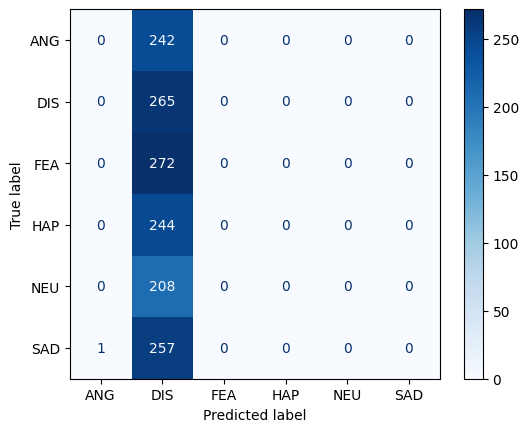

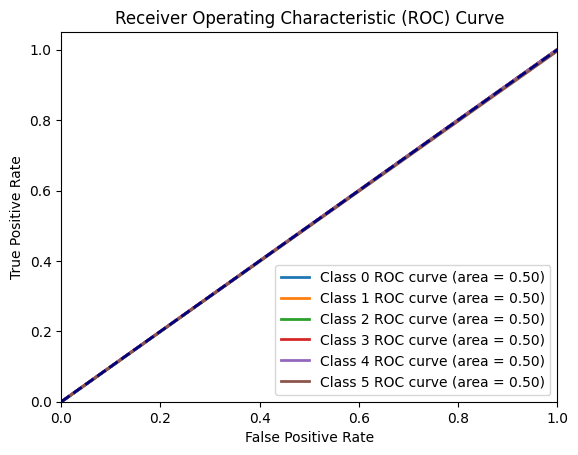

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


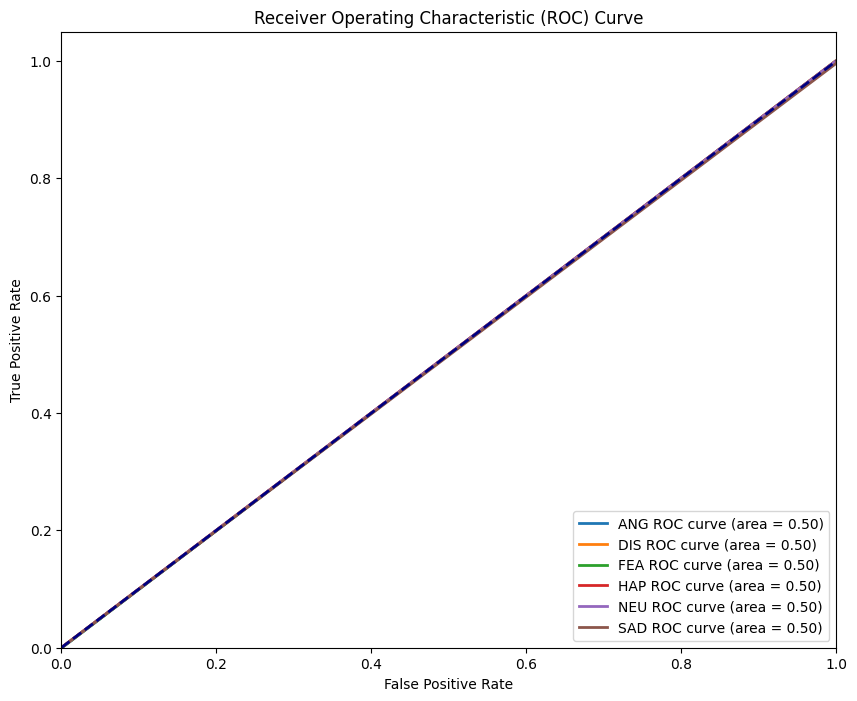

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Your existing ROC curve and area calculations here...
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(label_encoder.classes_)  # Get the number of classes from label encoder
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class using actual class names from label_encoder
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{label_encoder.classes_[i]} ROC curve (area = {roc_auc[i]:.2f})')

# Adding the random chance line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tcn import TCN

# Define the TCN model for multi-class classification
def build_tcn_model(input_shape, num_classes):
    model = Sequential()
    model.add(TCN(input_shape=input_shape, nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8], nb_stacks=1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the input shape and number of classes based on your data
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)

# Build the TCN model
tcn_model = build_tcn_model(input_shape, num_classes)

# Display the model summary
tcn_model.summary()

# Train the TCN model
history = tcn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Print training loss values to debug
print(history.history['loss'])
print(history.history['val_loss'])

# Predict on the test set
y_pred = tcn_model.predict(X_test)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_2 (TCN)                 (None, 64)                94784     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 6)                

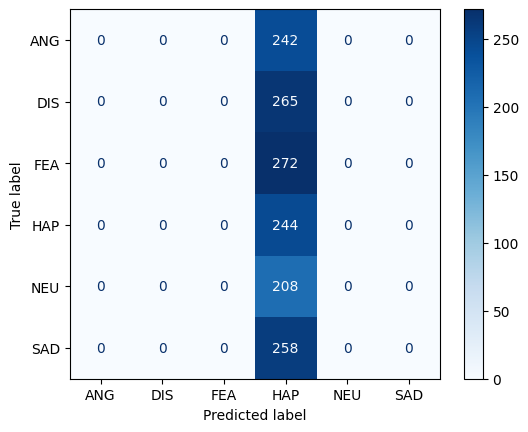

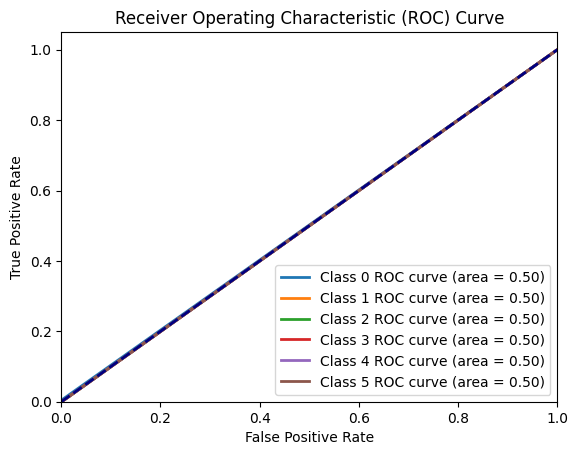

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import librosa
import numpy as np

def augment_data(y, sr):
    augmented_data = []

    # Original data
    augmented_data.append(y)

    # Noise addition
    noise = np.random.randn(len(y))
    y_noise = y + 0.005 * noise
    augmented_data.append(y_noise)

    # Time stretching
    y_stretch = librosa.effects.time_stretch(y, rate=0.8)
    augmented_data.append(y_stretch)
    y_stretch = librosa.effects.time_stretch(y, rate=1.2)
    augmented_data.append(y_stretch)

    # Pitch shifting
    y_shift = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    augmented_data.append(y_shift)
    y_shift = librosa.effects.pitch_shift(y, sr=sr, n_steps=-2)
    augmented_data.append(y_shift)

    return augmented_data

# Apply augmentation to all audio files
augmented_data = []
augmented_labels = []
for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    y, sr = librosa.load(audio_path, sr=None)
    augmentations = augment_data(y, sr)
    for aug in augmentations:
        mfccs, chroma, spectral_contrast = extract_features(audio_path)
        speaker_id, emotion = extract_labels(audio_file)
        augmented_data.append([mfccs, chroma, spectral_contrast, speaker_id, emotion])
        augmented_labels.append(emotion)

df_augmented = pd.DataFrame(augmented_data, columns=['MFCCs', 'Chroma', 'Spectral_Contrast', 'Speaker_ID', 'Emotion'])

# Continue with the preprocessing steps from here


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
# Combine the original and augmented data
df_combined = pd.concat([df, df_augmented])

# Determine the fixed length for padding/truncating
fixed_length = 100  # or choose an appropriate length based on your data

# Function to pad/truncate features
def pad_features(features, length):
    if features.shape[1] > length:
        return features[:, :length]
    elif features.shape[1] < length:
        return np.pad(features, ((0, 0), (0, length - features.shape[1])), mode='constant')
    else:
        return features

# Apply padding/truncating to features
df_combined['MFCCs'] = df_combined['MFCCs'].apply(lambda x: pad_features(x, fixed_length))
df_combined['Chroma'] = df_combined['Chroma'].apply(lambda x: pad_features(x, fixed_length))
df_combined['Spectral_Contrast'] = df_combined['Spectral_Contrast'].apply(lambda x: pad_features(x, fixed_length))

# Flatten features
def flatten_features(mfccs, chroma, spectral_contrast):
    return np.concatenate([mfccs.flatten(), chroma.flatten(), spectral_contrast.flatten()])

df_combined['Flattened_Features'] = df_combined.apply(lambda row: flatten_features(row['MFCCs'], row['Chroma'], row['Spectral_Contrast']), axis=1)

# Encode labels for multi-class classification
label_encoder = LabelEncoder()
df_combined['Emotion_Label'] = label_encoder.fit_transform(df_combined['Emotion'])

# Split data into features (X) and labels (y)
X = np.array(df_combined['Flattened_Features'].tolist())
y = np.array(df_combined['Emotion_Label'].tolist())

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for deep learning model (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], fixed_length, -1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


**MLP**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Define the MLP model for multi-class classification
def build_mlp_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  # Flatten the input data
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the input shape and number of classes based on your data
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)

# Build the MLP model
mlp_model = build_mlp_model(input_shape, num_classes)

# Display the model summary
mlp_model.summary()

# Train the MLP model
history = mlp_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Print training loss values to debug
print(history.history['loss'])
print(history.history['val_loss'])

# Predict on the test set
y_pred = mlp_model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute ROC curve and ROC area for each class using actual class names
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class using actual class names from label_encoder
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{label_encoder.classes_[i]} ROC curve (area = {roc_auc[i]:.2f})')

# Adding the random chance line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Flatten the data for Random Forest (as it does not work with 3D data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_flat, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Predict probabilities for ROC curve
y_pred_prob_rf = rf_model.predict_proba(X_test_flat)

# Compute ROC curve and ROC area for each class using actual class names
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class using actual class names from label_encoder
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{label_encoder.classes_[i]} ROC curve (area = {roc_auc[i]:.2f})')

# Adding the random chance line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Flatten the data for Decision Tree (as it does not work with 3D data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_flat, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Predict probabilities for ROC curve
y_pred_prob_dt = dt_model.predict_proba(X_test_flat)

# Compute ROC curve and ROC area for each class using actual class names
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class using actual class names from label_encoder
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{label_encoder.classes_[i]} ROC curve (area = {roc_auc[i]:.2f})')

# Adding the random chance line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Define the RNN model for multi-class classification
def build_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))
    model.add(SimpleRNN(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the input shape and number of classes based on your data
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = len(label_encoder.classes_)

# Build the RNN model
rnn_model = build_rnn_model(input_shape, num_classes)

# Display the model summary
rnn_model.summary()

# Train the RNN model
history = rnn_model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

# Print training loss values to debug
print(history.history['loss'])
print(history.history['val_loss'])

# Predict on the test set
y_pred_rnn = rnn_model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert predictions to class labels
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes_rnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute ROC curve and ROC area for each class using actual class names
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_rnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class using actual class names from label_encoder
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{label_encoder.classes_[i]} ROC curve (area = {roc_auc[i]:.2f})')

# Adding the random chance line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Function to extract and plot features
def plot_features(audio_path, class_name):
    y, sr = librosa.load(audio_path, sr=None)

    # Extract Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Plot features
    plt.figure(figsize=(15, 10))

    # Plot audio wave
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Audio Wave - {class_name}')

    # Plot Mel spectrogram
    plt.subplot(3, 1, 2)
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - {class_name}')

    # Plot chroma features
    plt.subplot(3, 1, 3)
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
    plt.colorbar()
    plt.title(f'Chroma Features - {class_name}')

    plt.tight_layout()
    plt.show()

# Get a sample audio file for each class
class_samples = {}
for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    _, emotion = extract_labels(audio_file)
    if emotion not in class_samples:
        class_samples[emotion] = audio_path

# Plot features for each class
for class_name, audio_path in class_samples.items():
    plot_features(audio_path, class_name)


In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Function to extract and return features for plotting
def extract_features_for_plotting(audio_path):
    y, sr = librosa.load(audio_path, sr=None)

    # Extract Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Extract chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    return y, sr, log_mel_spectrogram, chroma

# Get a sample audio file for each class
class_samples = {}
for audio_file in audio_files:
    audio_path = os.path.join('CREMA-D/AudioWAV', audio_file)
    _, emotion = extract_labels(audio_file)
    if emotion not in class_samples:
        class_samples[emotion] = audio_path

# Create subplots for audio waves, Mel spectrograms, and chroma features
num_classes = len(class_samples)
fig_audio_wave, axs_audio_wave = plt.subplots(num_classes, 1, figsize=(15, num_classes * 3))
fig_mel_spectrogram, axs_mel_spectrogram = plt.subplots(num_classes, 1, figsize=(15, num_classes * 3))
fig_chroma, axs_chroma = plt.subplots(num_classes, 1, figsize=(15, num_classes * 3))

# Plot features for each class
for i, (class_name, audio_path) in enumerate(class_samples.items()):
    y, sr, log_mel_spectrogram, chroma = extract_features_for_plotting(audio_path)

    # Plot audio wave
    librosa.display.waveshow(y, sr=sr, ax=axs_audio_wave[i])
    axs_audio_wave[i].set_title(f'Audio Wave - {class_name}')

    # Plot Mel spectrogram
    img = librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=axs_mel_spectrogram[i])
    fig_mel_spectrogram.colorbar(img, ax=axs_mel_spectrogram[i], format='%+2.0f dB')
    axs_mel_spectrogram[i].set_title(f'Mel Spectrogram - {class_name}')

    # Plot chroma features
    img = librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', ax=axs_chroma[i])
    fig_chroma.colorbar(img, ax=axs_chroma[i])
    axs_chroma[i].set_title(f'Chroma Features - {class_name}')

plt.tight_layout()
plt.show()
